In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# Import Dataset
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
print(df.columns.tolist())

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']


In [ ]:
# Removing Column
df.drop(columns=['Unnamed: 0'] , inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

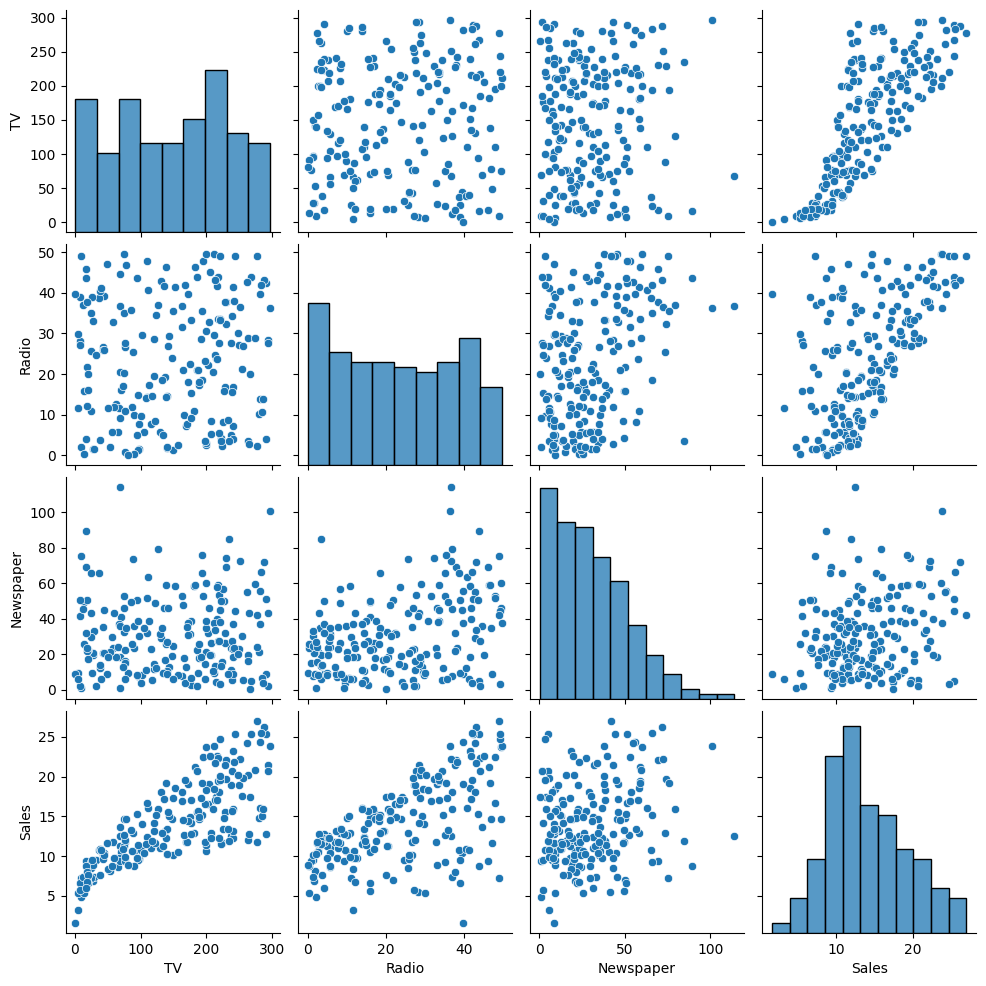

In [ ]:
# Data Visualization
sns.pairplot(df)

In [ ]:
correlation = df.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


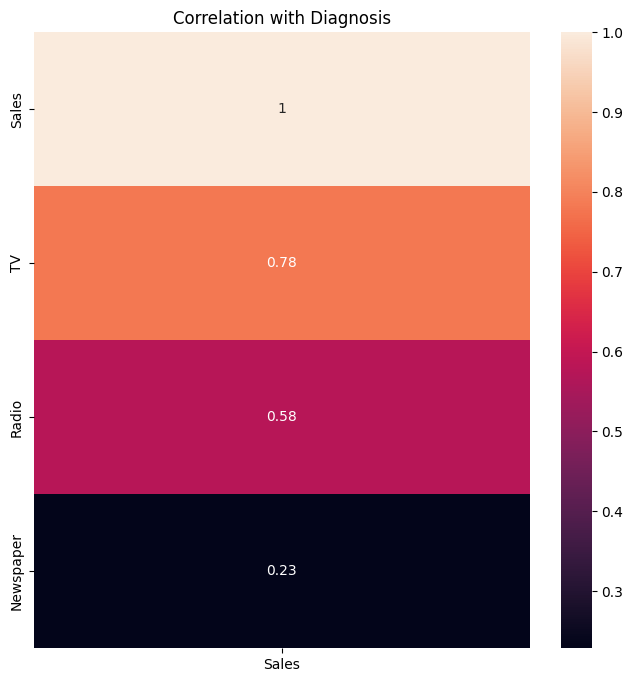

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Sales']].sort_values(by='Sales', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

In [ ]:
# Split Data
x = df.drop('Sales',axis = 1)
y = df['Sales']

In [ ]:
# Min Max Scaling
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [ ]:
# Training Pipeline

def train_test_model(model , x_train , x_test , y_train , y_test):
    # Train model
    model.fit(x_train , y_train)

    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))

    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

R2 Score =  89.56%
Mean Absolute Error =  1.0788802763848646
Mean Squared Error =  2.2564942472809344
Root Mean Squared Error =  1.5021631892976657


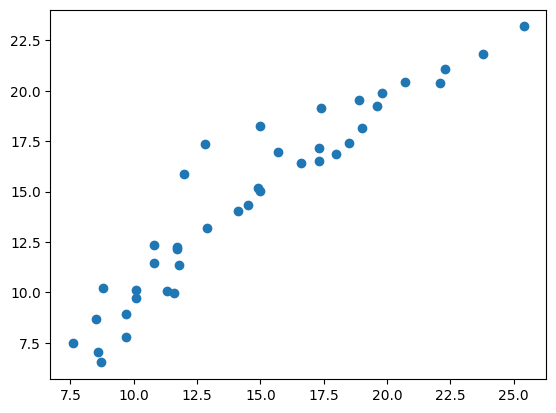

In [ ]:
# Linear Regression
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

R2 Score =  93.96%
Mean Absolute Error =  0.9025000000000002
Mean Squared Error =  1.3057500000000004
Root Mean Squared Error =  1.142694184810617


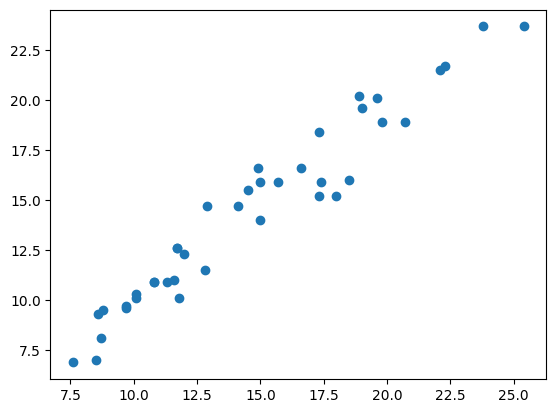

In [ ]:
# Decision Tree Regressor
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

R2 Score =  97.63%
Mean Absolute Error =  0.5549499999999962
Mean Squared Error =  0.5121694499999954
Root Mean Squared Error =  0.7156601497917816


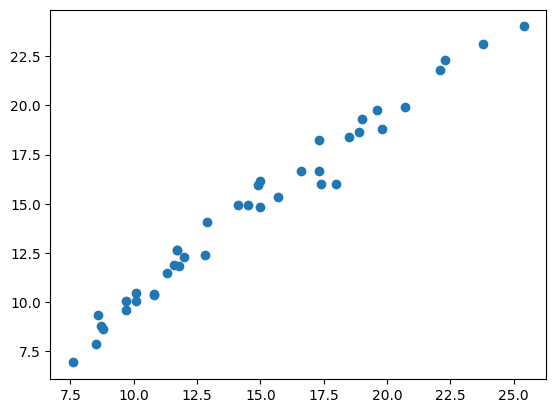

In [ ]:
# Randaom Forest Regressor
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

R2 Score =  97.65%
Mean Absolute Error =  0.5480284333229064
Mean Squared Error =  0.5068155642077319
Root Mean Squared Error =  0.7119098006122208


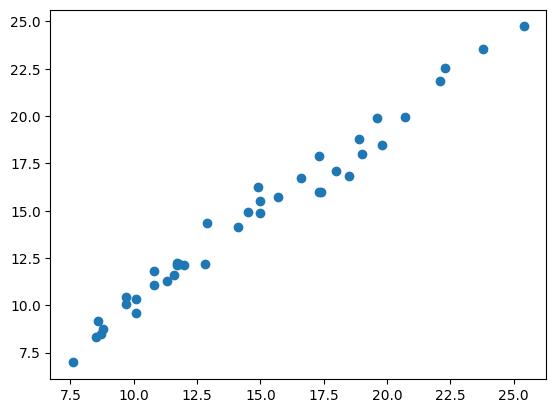

In [ ]:
# XG Boost Regressor
XG = train_test_model(XGBRegressor(),x_train,x_test,y_train,y_test)